In [24]:
import torch

torch.Size([12, 1, 12, 6, 6])

In [29]:
arxiv = torch.load('attention_maps/arxiv.pt')
cc = torch.load('attention_maps/common_crawl.pt')
poems = torch.load('attention_maps/poems_new.pt')

In [30]:
cc.shape, poems.shape, arxiv.shape

(torch.Size([12, 1, 12, 6, 6]),
 torch.Size([12, 1, 12, 6, 6]),
 torch.Size([12, 1, 12, 6, 6]))

In [207]:
import seaborn as sns
import numpy as np

def analyze_layer(layer, head=0):
    """Analyzes the first head of a given layer"""
    mat1 = arxiv[layer][0][head].detach().numpy()
    mat2 = cc[layer][0][head].detach().numpy()
    mat3 = poems[layer][0][head].detach().numpy()

    f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,3))
    g1 = sns.heatmap(mat1,cbar=False,ax=ax1)
    #g1.set_title('Arxiv')
    g1.set_ylabel('')
    g1.set_xlabel('')
    g2 = sns.heatmap(mat2,cbar=False,ax=ax2)
    g2.set_ylabel('')
    g2.set_xlabel('')
    #g2.set_title('Common Crawl')
    g3 = sns.heatmap(mat3,ax=ax3)
    #g3.set_title('Poems')
    g3.set_ylabel('')
    g3.set_xlabel('')
    
    for ax in (ax1,ax2,ax3):
        ax.set_xticks([])
        ax.set_yticks([])
    f.suptitle(f'Attention of Layer {layer}, Head 0')
    
    avc = np.mean(np.sqrt(mat1**2 + mat2**2))
    avp = np.mean(np.sqrt(mat1**2 + mat3**2))
    pvc = np.mean(np.sqrt(mat2**2 + mat3**2))
    print("L2 Norm / Euclidean Differences\n ----------------------- \n")
    print("Arxiv vs Common Crawl: ", avc)
    print("Arxiv vs Poems", avp)
    print("Poems vs Common Crawl", pvc)
    
    avc = np.sum(np.abs(mat1-mat2))
    avp = np.sum(np.abs(mat1-mat3))
    pvc = np.sum(np.abs(mat3-mat2))
    print("Absolute Differences\n ----------------------- \n")
    print("Arxiv vs Common Crawl: ", avc)
    print("Arxiv vs Poems", avp)
    print("Poems vs Common Crawl", pvc)
    
    return avc,avp, pvc

L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.30021748
Arxiv vs Poems 0.29741415
Poems vs Common Crawl 0.23748344
L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.28213128
Arxiv vs Poems 0.27752578
Poems vs Common Crawl 0.23991503
L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.30326307
Arxiv vs Poems 0.30595282
Poems vs Common Crawl 0.23623078
L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.27494428
Arxiv vs Poems 0.26871565
Poems vs Common Crawl 0.23793101
L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.29476446
Arxiv vs Poems 0.30073518
Poems vs Common Crawl 0.23943026
L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.29562205
Arxiv vs Poems 0.29913414
Poems vs Common Crawl 0.23868108
L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl: 

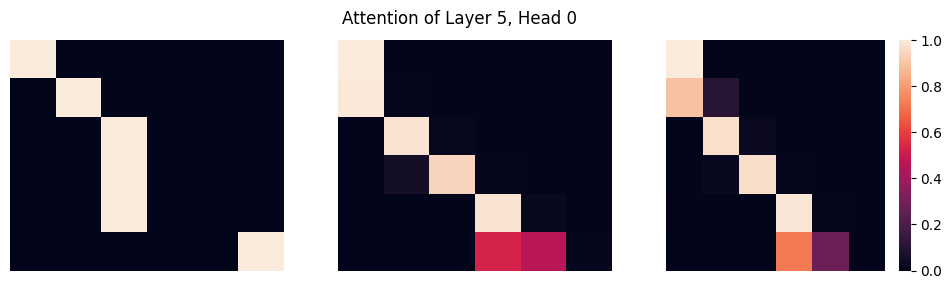

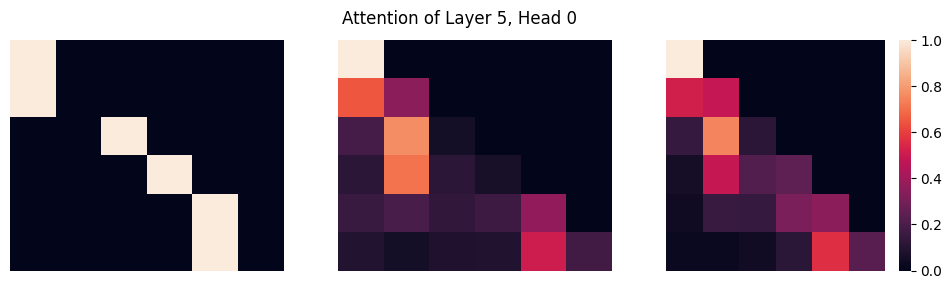

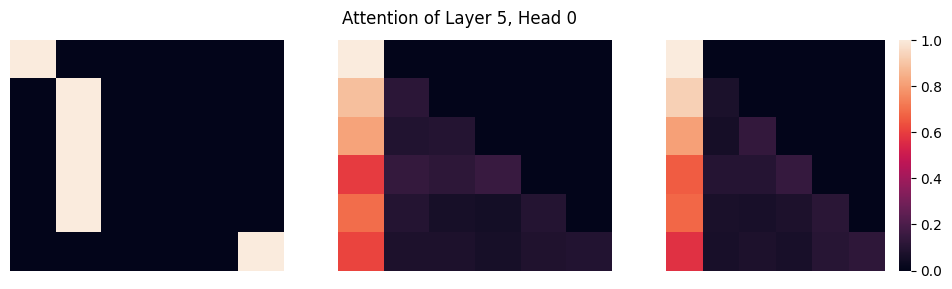

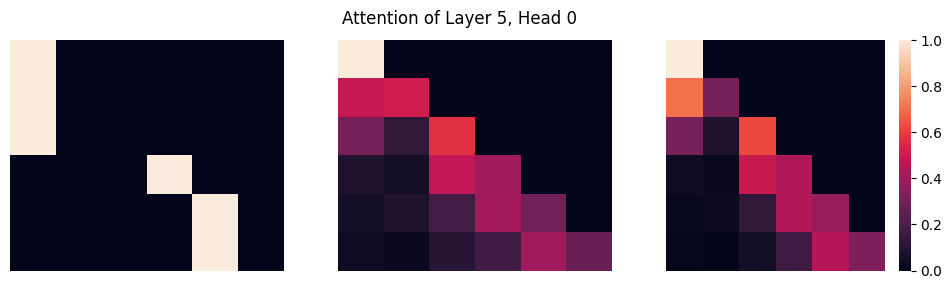

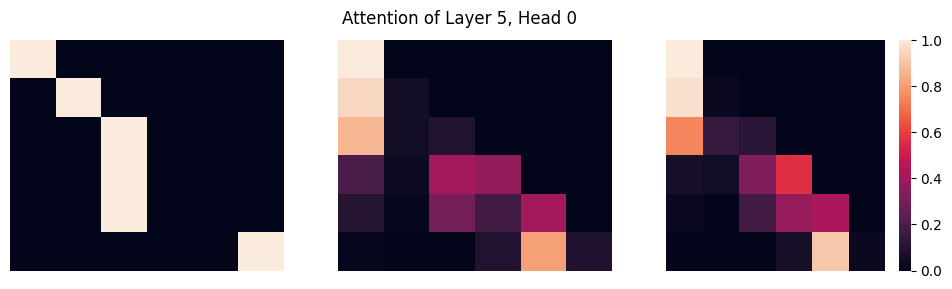

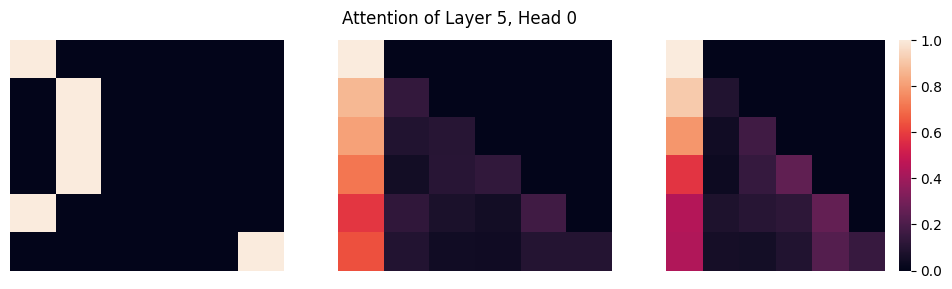

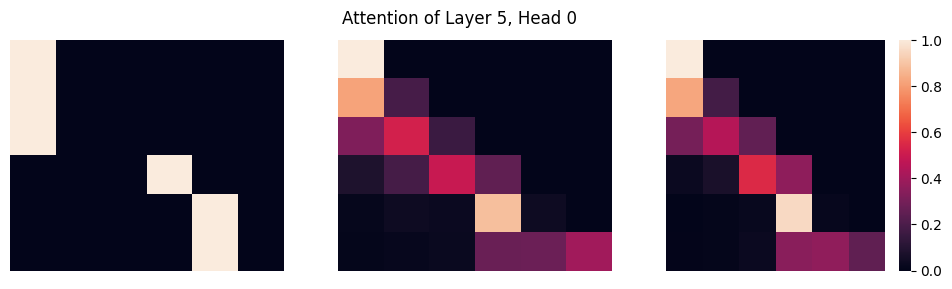

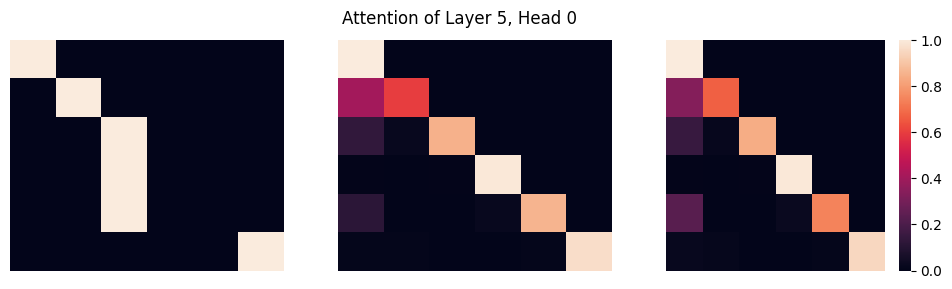

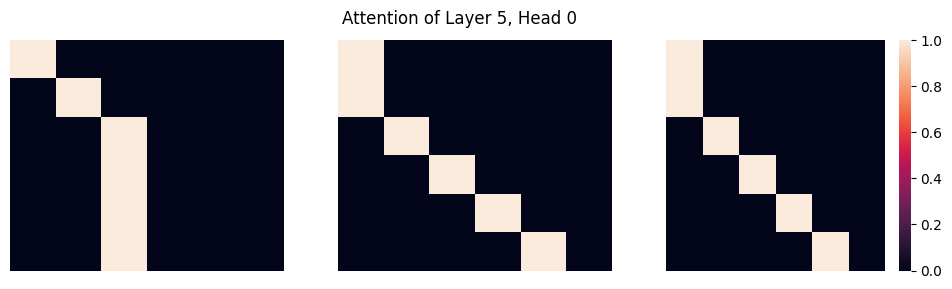

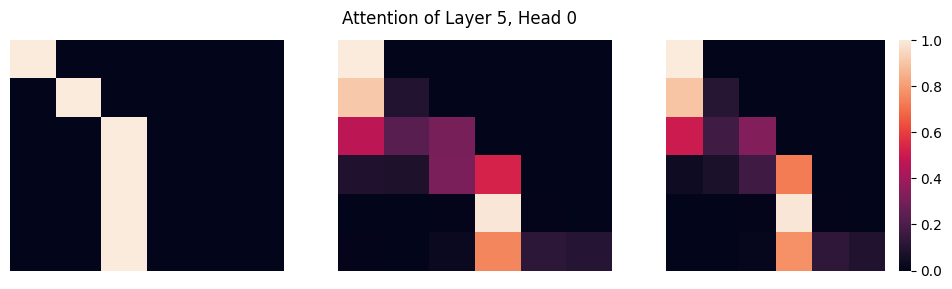

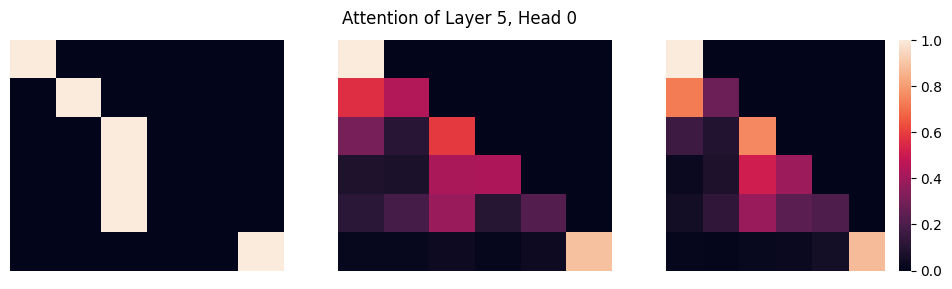

In [208]:
avcs, avps, pvcs = [], [], []

for i in range(11):
    a, b, c = analyze_layer(5, i)
    avcs.append(a)
    avps.append(b)
    pvcs.append(c)

In [211]:
[round(x,3) for x in pvcs]

[0.237, 0.24, 0.236, 0.238, 0.239, 0.239, 0.238, 0.236, 0.236, 0.237, 0.238]

L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.29858267
Arxiv vs Poems 0.29816192
Poems vs Common Crawl 0.23626015
Absolute Differences
 ----------------------- 

Arxiv vs Common Crawl:  8.511635
Arxiv vs Poems 8.476425
Poems vs Common Crawl 0.5570974


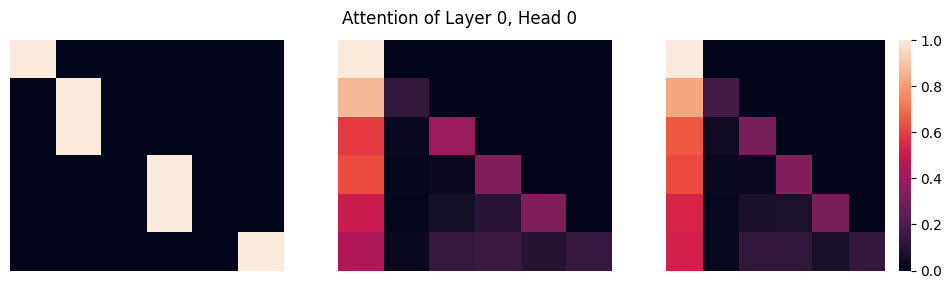

In [182]:
analyze_layer(0)

L2 Norm / Euclidean Differences
 ----------------------- 

Arxiv vs Common Crawl:  0.28292185
Arxiv vs Poems 0.2884668
Poems vs Common Crawl 0.2368176
Absolute Differences
 ----------------------- 

Arxiv vs Common Crawl:  7.025912
Arxiv vs Poems 7.536126
Poems vs Common Crawl 0.7469578


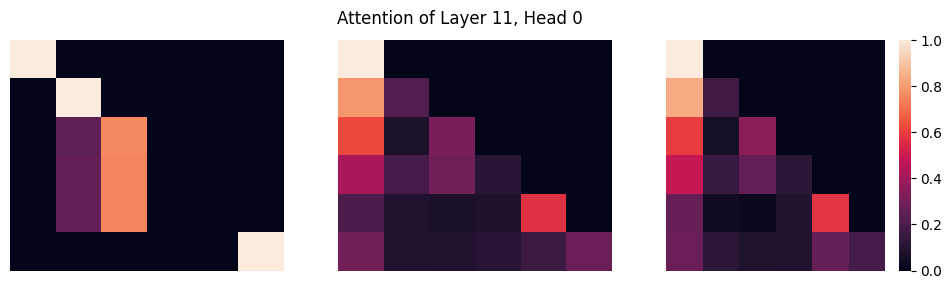

In [190]:
analyze_layer(11, 6)